<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Parcial%202/Parcial_2_24%2C%2025%2C%2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Punto 24. Tierra plana**

(a) Cargue N = 50 puntos y pesos de Gauss para calcular el campo gravitacional sobre
el disco.

In [ ]:
import numpy as np

n = 50

points, weights = np.polynomial.legendre.leggauss(n)

print("Gauss-Legendre Points:\n", points)
print("\nGauss-Legendre Weights:\n", weights)


Gauss-Legendre Points:
 [-0.9988664  -0.99403197 -0.98535408 -0.97286439 -0.95661096 -0.93665662
 -0.91307856 -0.88596798 -0.85542977 -0.82158207 -0.78455583 -0.7444943
 -0.70155247 -0.65589647 -0.60770293 -0.5571583  -0.50445814 -0.44980633
 -0.39341431 -0.33550025 -0.27628819 -0.21600724 -0.15489059 -0.0931747
 -0.03109834  0.03109834  0.0931747   0.15489059  0.21600724  0.27628819
  0.33550025  0.39341431  0.44980633  0.50445814  0.5571583   0.60770293
  0.65589647  0.70155247  0.7444943   0.78455583  0.82158207  0.85542977
  0.88596798  0.91307856  0.93665662  0.95661096  0.97286439  0.98535408
  0.99403197  0.9988664 ]

Gauss-Legendre Weights:
 [0.00290862 0.0067598  0.01059055 0.01438082 0.01811556 0.02178024
 0.02536067 0.02884299 0.03221373 0.03545984 0.03856876 0.04152846
 0.0443275  0.04695505 0.04940094 0.0516557  0.05371062 0.05555774
 0.05718993 0.05860085 0.05978506 0.06073797 0.0614559  0.06193607
 0.06217662 0.06217662 0.06193607 0.0614559  0.06073797 0.05978506
 0.0586

Código para el cálculo de la doble integral usando la cuadratura de Gauss-Legendre, y el ajuste de los límites indicado por la fórmula:

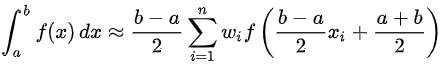

In [ ]:
import numpy as np

# Cuadratura Gaussiana
def gaussian_quadrature_2D(f, a, b, c, d, n):

    # Puntos y pesos de Gauss para el intervalo [-1,1]

    x_nodes, x_weights = np.polynomial.legendre.leggauss(n)
    y_nodes, y_weights = np.polynomial.legendre.leggauss(n)

    # Transformacion de límites [a, b] para la integral de r
    def transform_r(xi):
        return ((b - a) / 2) * xi + ((a + b) / 2)

    # Transformacion de límites [c, d] para la integral de phi
    def transform_phi(yi):
        return ((d - c) / 2) * yi + ((c + d) / 2)

    # Cuadratura Gaussiana doble
    integral = 0
    for i in range(n):
        for j in range(n):

            r_trans = transform_r(x_nodes[i])
            phi_trans = transform_phi(y_nodes[j])


            integral += x_weights[i] * y_weights[j] * f(r_trans, phi_trans)

    # (Jacobiana)
    integral *= (b - a) / 2 * (d - c) / 2
    return integral

#Funcion de la ecuación
def g(r, phi):
    z = 0.2
    x = 0
    y = 0
    numerator = z * r
    denominator = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))**(3/2)
    return numerator / denominator


k = 1.9429303960
R = 1
a, b = 0, R
c, d = 0, 2 * np.pi


n = 50


resultado = gaussian_quadrature_2D(g, a, b, c, d, n)

respuesta = -k * resultado



(e) Usando coordenadas polares de calcula el comportamiento azimutal del campo gravitaciónal de un disco plano de materia.

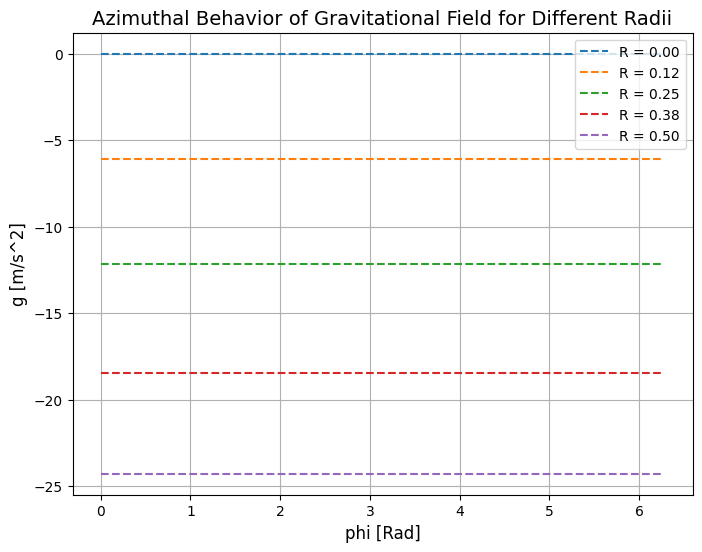

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def gravitational_acceleration_r_phi(R, phi):
    z = 0.2
    x = 0
    y = 0
    numerator = z * R
    denominator = (x**2 + y**2 + z**2 - 2 * R * x * np.cos(phi) - 2 * R * y * np.sin(phi))**(3/2)
    return numerator / denominator


radii = [0, 0.125, 0.25, 0.38, 0.5]
phi_values = np.linspace(0, 2 * np.pi, 10)

k = 1.9429303960


plt.figure(figsize=(8, 6))

for R in radii:
    g_phi = [-k * gravitational_acceleration_r_phi(R, phi) for phi in phi_values]
    plt.plot(phi_values, g_phi, label=f'R = {R:.2f}', linestyle='--')


plt.xlabel('phi [Rad]', fontsize=12)
plt.ylabel('g [m/s^2]', fontsize=12)
plt.title('Comportamiento azimutal del campo para diferentes radios', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


(c) Defina una función para calcular la integral usando la forma de doble cuadratura:

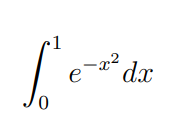

In [ ]:
import numpy as np


def gaussian_quadrature_1D(f, a, b, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)


    def transform_x(xi):
        return 0.5 * (b - a) * xi + 0.5 * (a + b)


    integral = 0
    for i in range(n):

        x_trans = transform_x(nodes[i])
        integral += weights[i] * f(x_trans)

    #(Jacobiana)
    integral *= 0.5 * (b - a)
    return integral

def integrand(x):
    return np.exp(-x**2)

a, b = 0, 1
n = 50

resultado = gaussian_quadrature_1D(integrand, a, b, n)



Result of the integral: 0.7468241328124269


# **Punto 25. Deducción teórica de la cuadratura de Laguerre para dos puntos.**



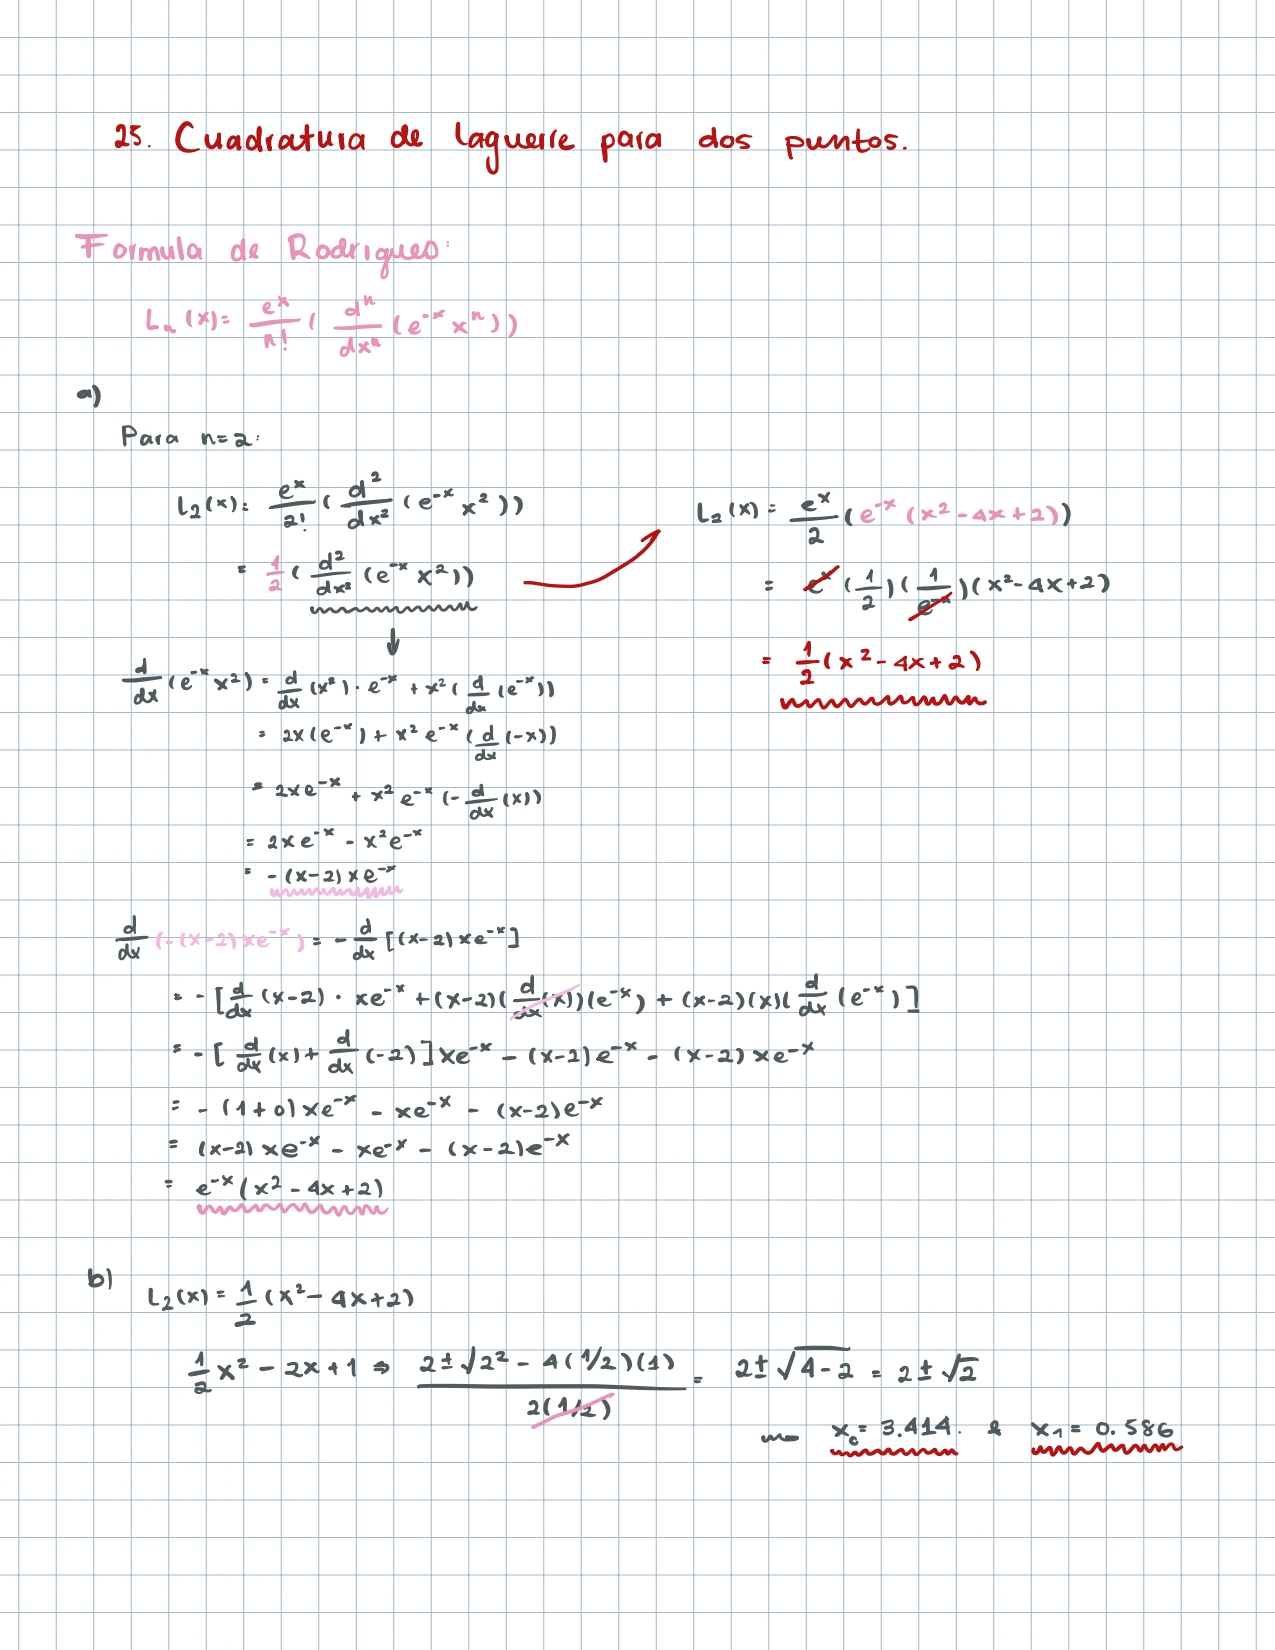

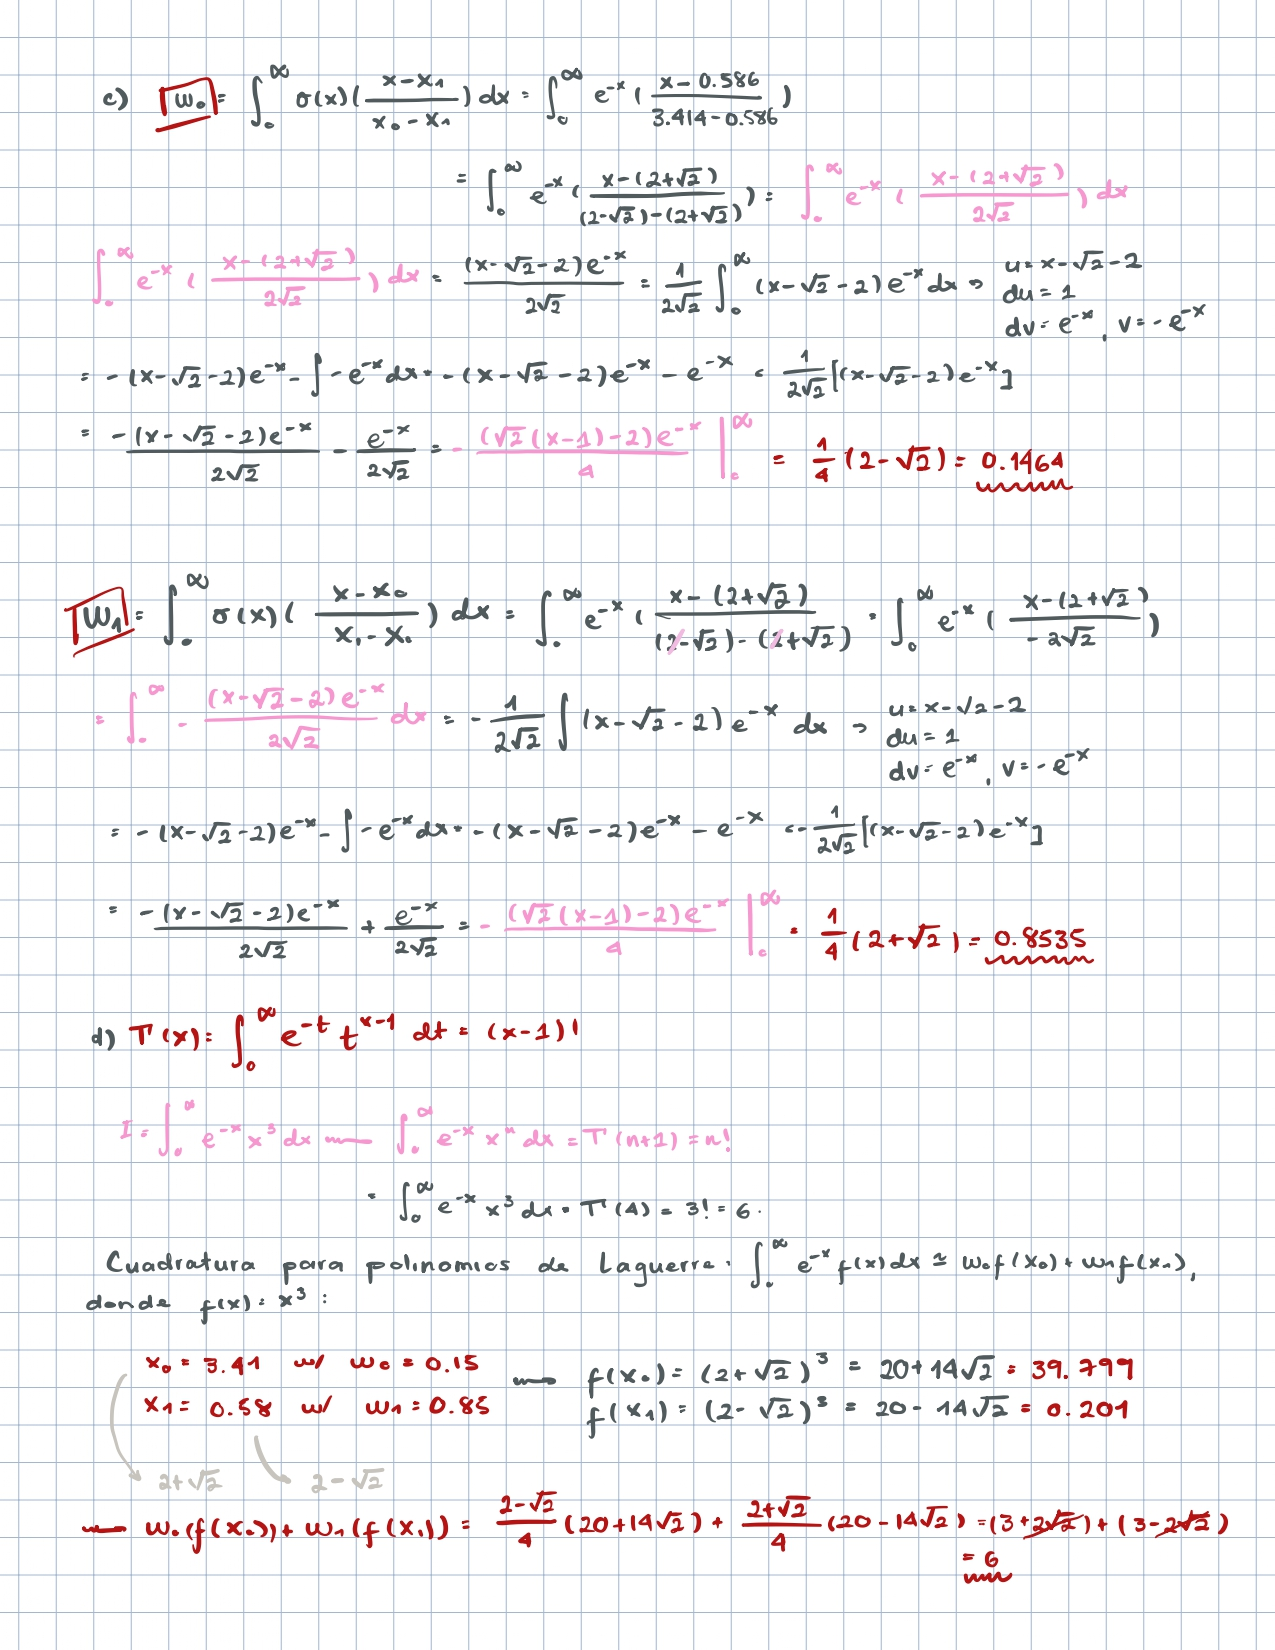

# **26. Suma de Riemann como modelo de aproximación.**

***(Teórico)***



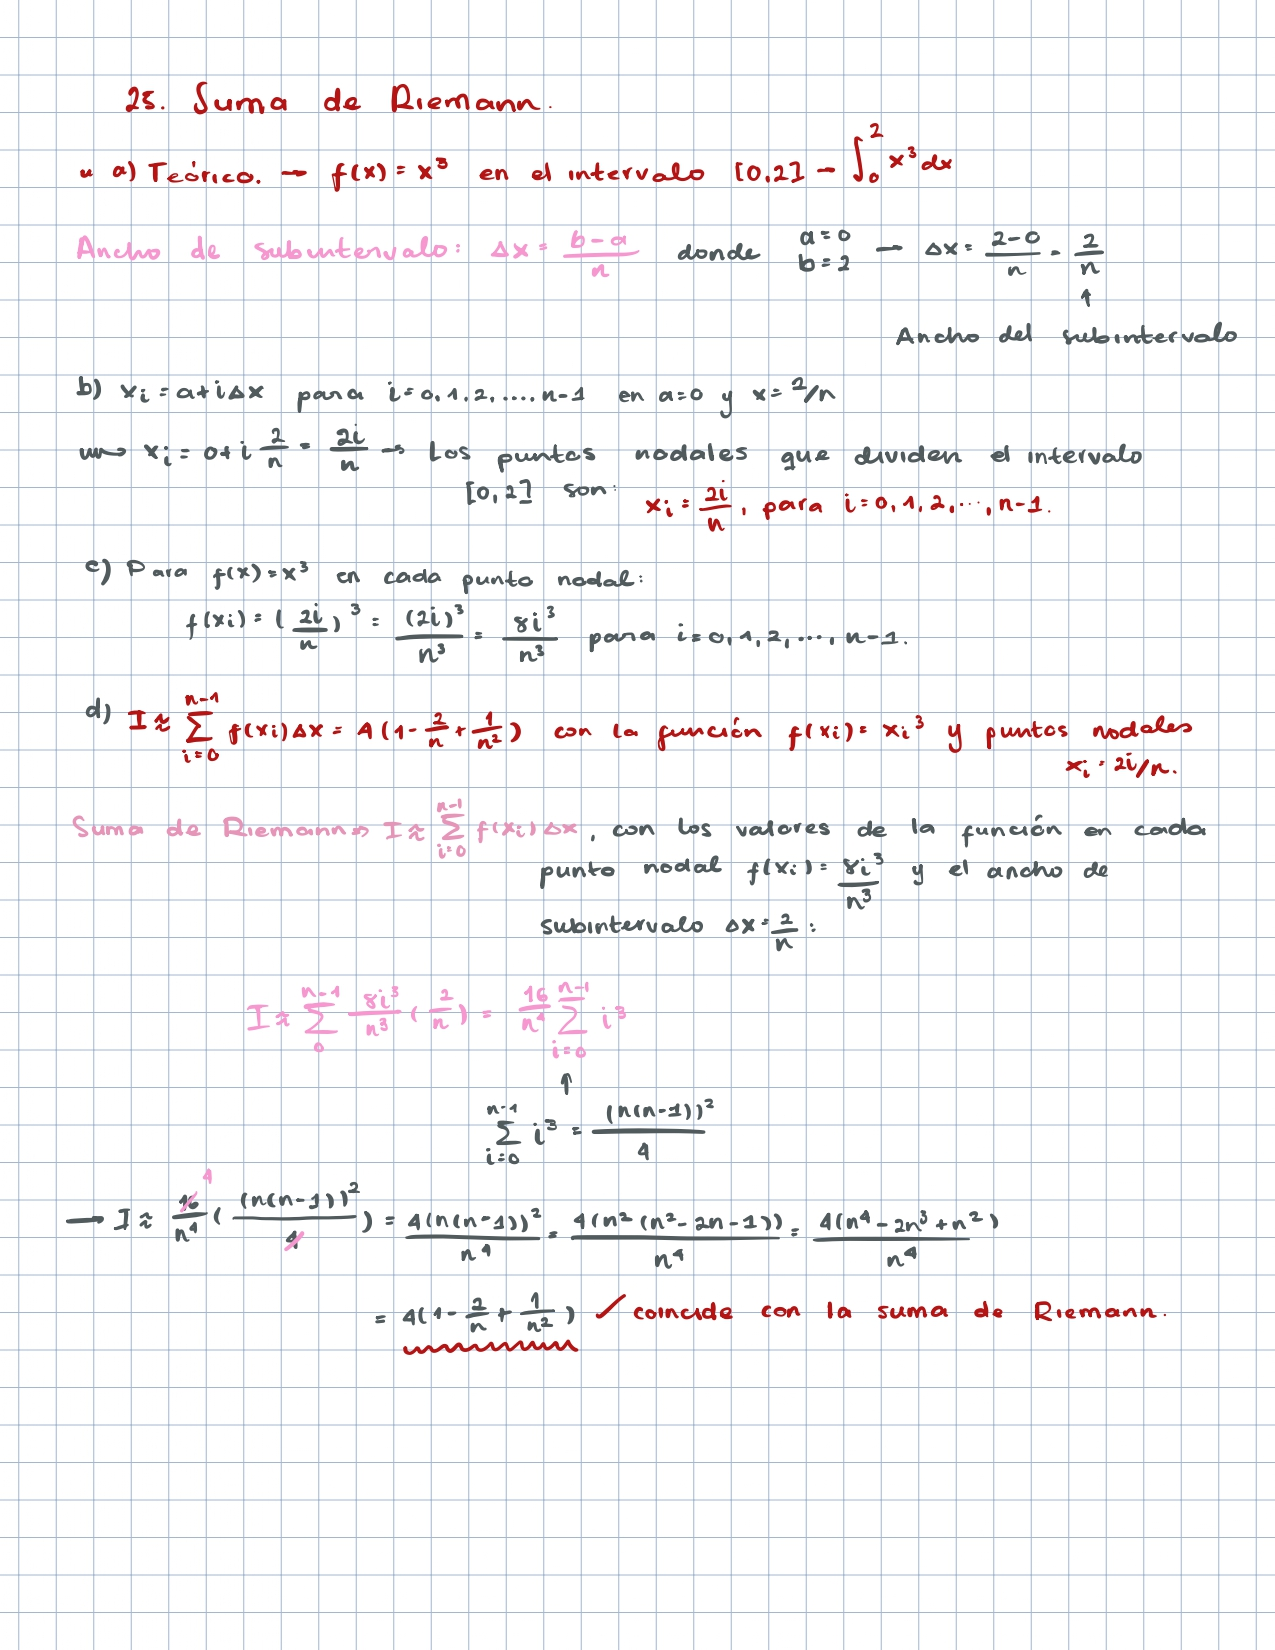